In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,404 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and dire

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style='whitegrid', font_scale=0.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='NanumBarunGothic')

In [2]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/hana/data/kospi.csv', encoding='cp949')

In [5]:
df_name = pd.read_csv('/content/drive/MyDrive/hana/data/kospi_info.csv', encoding='cp949')

In [6]:
col = ['종목코드', '대비', '시가', '고가', '저가', '거래대금']
df_drop = df.drop(columns=col).set_index('종목명')

# Preprocessing

### PCA + scale

In [23]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_drop.drop(columns='종가'))

scaled_df = pd.DataFrame(scaled_data, columns=df_drop.columns[1:])

In [25]:
pca = PCA()

# 데이터를 통해 PCA 모델 학습
pca.fit(scaled_df)

# 누적 설명된 분산 비율 계산
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# 주성분 중요도 확인
print("Cumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)

Cumulative Explained Variance Ratio:
[0.53060742 0.82583223 0.98140682 1.        ]


In [26]:
# 선택한 주성분의 수
n_components = 2

# 주성분 중요도에서 정보 손실율 계산
info_loss = 1 - cumulative_variance_ratio[n_components - 1]

print(f"\nInformation Loss with {n_components} Components: {info_loss:.4f}")


Information Loss with 2 Components: 0.1742


In [27]:
# 주성분을 사용하여 데이터 변환
transformed_data = pca.transform(scaled_df)

# 두 개의 주성분으로 이루어진 데이터프레임 생성
transformed_df = pd.DataFrame(data=transformed_data[:, :2], columns=['PC1', 'PC2'], index=df_drop.index).reset_index()

### Y scale

In [36]:
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(df_drop['종가'].to_frame())

scaled_df2 = pd.DataFrame(scaled_data2, columns=['종가'])

In [43]:
concat_data = pd.concat([transformed_df, scaled_df2], axis=1)
concat_data.set_index('종목명', inplace=True)

In [46]:
concat_data_sample = concat_data[:30]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


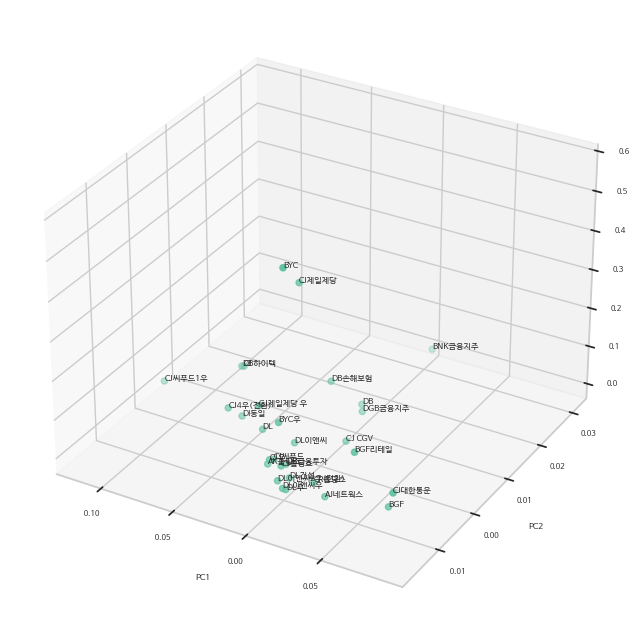

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 프레임에서 필요한 정보 추출
names = concat_data_sample.index
pc1 = concat_data_sample['PC1']
pc2 = concat_data_sample['PC2']
closing_price = concat_data_sample['종가']

# 3차원 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3차원 산점도 그리기
ax.scatter(pc1, pc2, closing_price, marker='o')

# 각 점에 종목명 표시
for i, name in enumerate(names):
    ax.text(pc1[i], pc2[i], closing_price[i], name)

# 축 레이블 설정
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Closing Price')

# 그래프 보이기
plt.show()
